In [202]:
import pandas as pd
import numpy as np
from header_mappings import java2python
from matplotlib import pyplot as plt
from sklearn import  tree

# Load and transform train and test datasets

In [203]:
# header of the CICIDS2017 dataset
test_header =   "Destination Port, Flow Duration, Total Fwd Packets, Total Backward Packets,Total Length of Fwd Packets, Total Length of Bwd Packets, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std,Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std,Flow Bytes/s, Flow Packets/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min,Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min,Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min,Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Length, Bwd Header Length,Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, Packet Length Variance,FIN Flag Count, SYN Flag Count, RST Flag Count, PSH Flag Count, ACK Flag Count, URG Flag Count, CWE Flag Count, ECE Flag Count, Down/Up Ratio, Average Packet Size, Avg Fwd Segment Size, Avg Bwd Segment Size,Fwd Header Length2,Fwd Avg Bytes/Bulk, Fwd Avg Packets/Bulk, Fwd Avg Bulk Rate, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets, Subflow Fwd Bytes, Subflow Bwd Packets, Subflow Bwd Bytes,Init_Win_bytes_forward, Init_Win_bytes_backward, act_data_pkt_fwd, min_seg_size_forward,Active Mean, Active Std, Active Max, Active Min,Idle Mean, Idle Std, Idle Max, Idle Min, Label"
test_columns = [s.strip() for s in test_header.split(',')]
# header of the generated dataset
train_header = "src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,pkt_len_max,pkt_len_min,pkt_len_mean,pkt_len_std,pkt_len_var,fwd_header_len,bwd_header_len,fwd_seg_size_min,fwd_act_data_pkts,flow_iat_mean,flow_iat_max,flow_iat_min,flow_iat_std,fwd_iat_tot,fwd_iat_max,fwd_iat_min,fwd_iat_mean,fwd_iat_std,bwd_iat_tot,bwd_iat_max,bwd_iat_min,bwd_iat_mean,bwd_iat_std,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,ece_flag_cnt,down_up_ratio,pkt_size_avg,init_fwd_win_byts,init_bwd_win_byts,active_max,active_min,active_mean,active_std,idle_max,idle_min,idle_mean,idle_std,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,attack"
train_columns = train_header.split(',')

In [204]:
print(len(test_columns))
print(len(train_columns))

79
83


In [205]:
print(len(test_columns))
print(len(set(test_columns)))

79
79


In [206]:
from collections import defaultdict
counts = defaultdict(lambda: 0)
for col in test_columns:
    counts[col] += 1

for k, v in counts.items():
    if v > 1:
        print(f"{k}: {v}")

## Load test dataset

In [274]:
test_df = pd.read_csv(
    "./test_dataset.csv",
#    true_values=["ATTACK"],
#    false_values=["BENIGN"],
    header=0, names=test_columns
)
test_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702162,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [275]:
same_values = test_df.loc[test_df['Fwd Header Length'] == test_df['Fwd Header Length2']]
print(f"test_df len     = {len(test_df)}")
print(f"same_vlaues len = {len(same_values)}")

test_df len     = 456833
same_vlaues len = 456833


Obviously the column "Fwd Header Length2" is a duplicate so it is dropped

In [276]:
test_df.drop(columns=["Fwd Header Length2"], inplace=True)

In [277]:
# drop anything with NaN
test_df.replace([np.inf, - np.inf], np.nan, inplace=True)
test_df = test_df.dropna()
print(len(test_df))

456327


<AxesSubplot:>

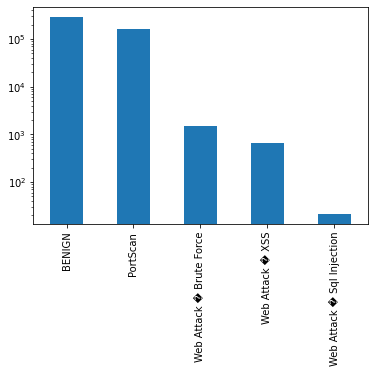

In [278]:
test_df['Label'].value_counts().plot(kind='bar', logy=True)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,False
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,False
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,False
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702162,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,False
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,False


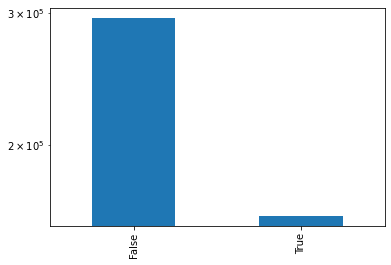

In [279]:
# change all labels to True or False
test_df.loc[test_df['Label'] == 'BENIGN', 'Label'] = False
test_df.loc[test_df['Label'] != False, 'Label'] = True
test_df = test_df.astype({'Label': 'bool'})
test_df['Label'].value_counts().plot(kind='bar', logy=True)
test_df.head()

## Load train dataset

In [280]:
train_df = pd.read_csv(
    "../data/dataset.csv",
    true_values=["true"],
    false_values=["false"],
    header=0, names=train_columns
)
train_df.head()

,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,attack
0,172.19.0.1,172.19.255.255,42283,32414,17,2022-06-14 09:27:50,1.000189e+08,10.078098,0.159970,0.159970,...,0.0,0.0,63.0,0.0,0,16,0,1008,0,NaN
1,172.19.0.1,172.19.255.255,42283,32414,17,2022-06-14 09:29:40,1.000136e+08,9.448712,0.149980,0.149980,...,0.0,0.0,63.0,0.0,0,15,0,945,0,NaN
2,172.19.0.1,172.19.255.255,42283,32414,17,2022-06-14 09:31:50,1.000146e+08,10.078529,0.159977,0.159977,...,0.0,0.0,63.0,0.0,0,16,0,1008,0,NaN
3,172.19.0.1,172.19.255.255,42283,32414,17,2022-06-14 09:33:35,9.501348e+07,8.619830,0.136823,0.136823,...,0.0,0.0,63.0,0.0,0,13,0,819,0,NaN
4,172.19.0.1,172.19.255.255,42283,32414,17,2022-06-14 09:35:15,9.501405e+07,8.619778,0.136822,0.136822,...,0.0,0.0,63.0,0.0,0,13,0,819,0,NaN


Now select only columns from test dataset from train, in that order

In [281]:
# first get new column names
train_column_names = [java2python[col] for col in test_df.columns]
# get only those columns, in that order
train_df = train_df[train_column_names]
# rename the columns (not neccessery)
train_df.columns = [col for col in test_df.columns]
train_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,32414,1.000189e+08,16,0,1008,0,63.0,63.0,63.0,0.0,...,8,6.668165e+06,4.714584e+06,1.000202e+07,7.362366e+02,7.501294e+06,2.500425e+06,1.000196e+07,5.000443e+06,NaN
1,32414,1.000136e+08,15,0,945,0,63.0,63.0,63.0,0.0,...,8,3.750534e+06,2.165333e+06,5.000900e+06,6.723404e+01,7.000967e+06,4.000597e+06,1.500216e+07,5.000282e+06,NaN
2,32414,1.000146e+08,16,0,1008,0,63.0,63.0,63.0,0.0,...,8,5.000267e+06,4.082455e+06,1.000034e+07,4.096031e+02,7.500651e+06,2.500162e+06,1.000132e+07,5.000242e+06,NaN
3,32414,9.501348e+07,13,0,819,0,63.0,63.0,63.0,0.0,...,8,1.000146e+07,9.030258e+02,1.000219e+07,1.000019e+07,8.001264e+06,2.449511e+06,1.000145e+07,5.000864e+06,NaN
4,32414,9.501405e+07,13,0,819,0,63.0,63.0,63.0,0.0,...,8,6.668185e+06,6.237277e+06,1.500315e+07,3.721714e+02,7.001342e+06,4.000634e+06,1.500261e+07,5.000402e+06,NaN


unknown = 39


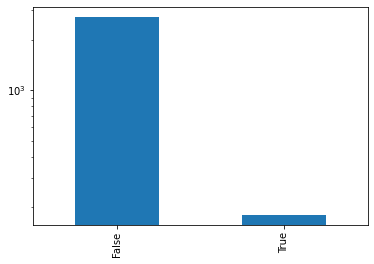

In [282]:
# benign  = train_df.loc[train_df['Label'] == False]
# attack  = train_df.loc[train_df['Label'] == True]
# unknown = train_df.loc[train_df['Label'].isna()]
#print(f"benign  = {len(benign)}")
#print(f"attack  = {len(attack)}")
#print(f"unknown = {len(unknown)}")
train_df['Label'].value_counts().plot(kind='bar', logy=True)
print(f"unknown = {len(train_df.loc[train_df['Label'].isna()])}")

In [283]:
# assume all NA are attacks (valid assumption)
train_df['Label'].fillna(value=True, inplace=True)

# Split features and labels

In [284]:
train_X = train_df.drop(columns=['Label'])
train_y = train_df['Label']

test_X = test_df.drop(columns=['Label'])
test_y = test_df['Label']

In [285]:
test_y

0         False
1         False
2         False
3         False
4         False
          ...  
456828    False
456829    False
456830    False
456831    False
456832    False
Name: Label, Length: 456327, dtype: bool

In [286]:
# switch labels just to make graph better
# semantics now are True == Benign and False == Attack
train_y = ~train_y
test_y = ~test_y

#  Fit the decision tree

In [287]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3).fit(train_X, train_y)

# Evaluate

In [288]:
def eval(Y, Y_):
    Y  = np.array(Y)
    Y_ = np.array(Y_)
    tp = sum(np.logical_and(Y_ == True, Y == True))
    fn = sum(np.logical_and(Y_ == True, Y == False))
    tn = sum(np.logical_and(Y_ == False, Y == False))
    fp = sum(np.logical_and(Y_ == False, Y == True))

    recall = tp / (tp + fn) if (tp + fn) > 0 else None
    precision = tp / (tp + fp) if (tp + fp) > 0 else None
    accuracy = (tp + tn) / (tp + fn + tn + fp)

    print(f"accuracy = {accuracy} recall = {recall} precision = {precision}")
    return np.array([[tp, fn], [fp, tn]])


In [289]:
predictions = decision_tree.predict(train_X.dropna())
eval(train_y, predictions)

accuracy = 0.9996603260869565 recall = 0.9996330275229358 precision = 1.0


array([[2724,    1],
       [   0,  219]])

In [290]:
# on test set
test_p = decision_tree.predict(test_X.dropna())
eval(test_y, test_p)

accuracy = 0.35811380873803217 recall = 0.5037948858726677 precision = 0.5468150591007743


array([[161498, 159065],
       [133845,   1919]])

The IDS predicts very badly. Let us explore why.

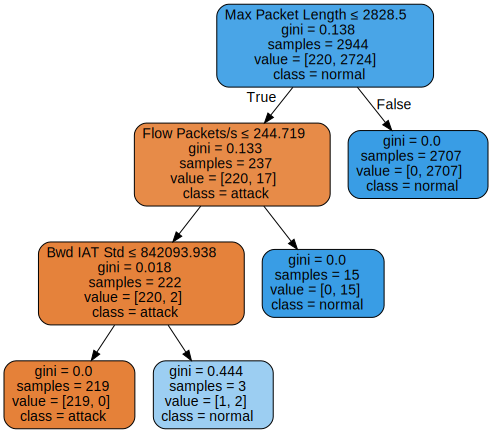

In [224]:
import graphviz

dot_data = tree.export_graphviz(
    decision_tree,
    feature_names=test_X.columns,
    # switch the labels for the sake of the plot
    class_names=['attack', 'normal'],
    filled=True, rounded=True, special_characters=True, out_file=None
)
graph = graphviz.Source(dot_data)
graph #.render('decision_tree', format='png')

In [226]:
# plot correlation matrix with features used by the decision tree only
dt_features = ['Max Packet Length', 'Flow Packets/s', 'Bwd IAT Min', 'Label']
dt_test_df = test_df[dt_features]
# it looks terrible
dt_test_df.corr()

test_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


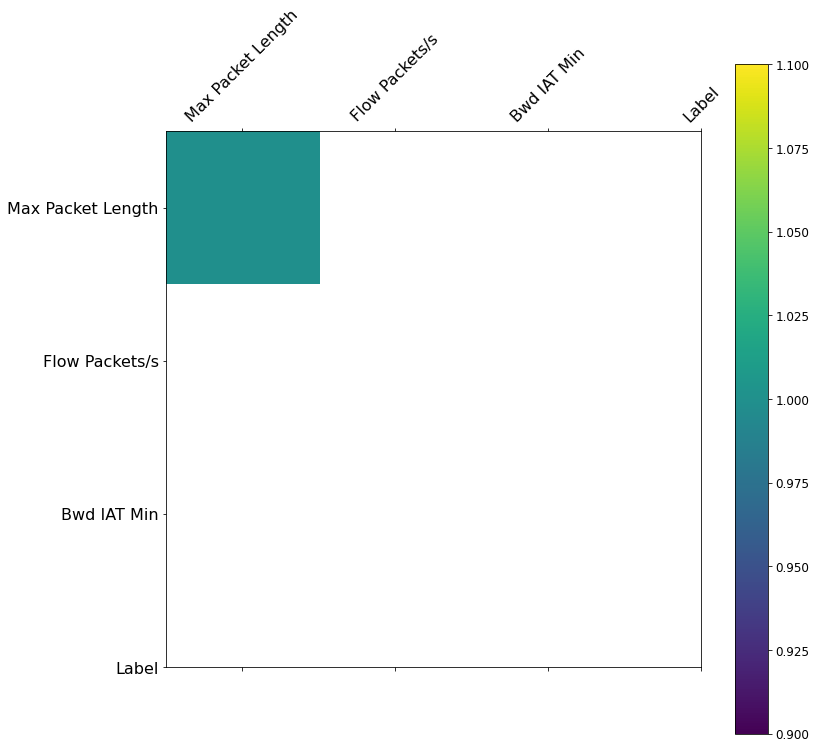

In [198]:
plt.figure(figsize=(12, 12))
plt.matshow(dt_test_df.corr(), fignum=1)
plt.yticks(np.array(range(len(dt_test_df.columns))), dt_test_df.columns, fontsize=16)
plt.xticks(np.array(range(len(dt_test_df.columns))), dt_test_df.columns, rotation=45, fontsize=16)
plt.colorbar().ax.tick_params(labelsize=12)

plt.show() # savefig('./test_corr.png')
plt.close()